# EDA of Videos

### Segment 1: Loading and Initial Exploration

This segment loads the dataset, displays the header, and provides basic information about data types, missing values, and descriptive statistics.

In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from prettytable import PrettyTable

# Load the dataset
df = pd.read_csv('pinoybaiting_videos_dataset.csv')

# Display the header and first 10 rows of data in a basic table format
print(df.head(5))


       videoId          Publish Date                 channelId  \
0  eUouFmegReQ  2017-01-27T03:36:04Z  UCCgVh36x3hbuRnHMpwl443Q   
1  KHYVLlfrlhQ  2017-01-29T20:17:39Z  UCCgVh36x3hbuRnHMpwl443Q   
2  S7h1GJ6Zuvk  2017-01-27T03:01:26Z  UCCgVh36x3hbuRnHMpwl443Q   
3  CKIXGJtS36c  2017-01-28T16:33:59Z  UCCgVh36x3hbuRnHMpwl443Q   
4  hFUzhd-R6GQ  2017-01-21T14:44:59Z  UCCgVh36x3hbuRnHMpwl443Q   

                                         Video Title  \
0  Roland 'Bunot' Abante - To Love Somebody (Mich...   
1  Marcelito Pomoy - Power of Love (Celine Dion) ...   
2  Xia Vigor as Taylor Swift (Your Face Sounds Fa...   
3  Jessica Sanchez & Joshua Ledet - I Knew You We...   
4  Lea Salonga VS Ruthie Henshall - I Dream A Dre...   

                                   Video Description    Channel Title  \
0  Watch the 'Roland 'Bunot' Abante - To Love Som...  Music Game News   
1  Watch the 'Marcelito Pomoy - Power of Love' co...  Music Game News   
2  Watch the Xia Vigor as Taylor Swift performa

In [7]:
# Display data types and missing values
df.info()

# Display descriptive statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42285 entries, 0 to 42284
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   videoId                 42285 non-null  object
 1   Publish Date            42285 non-null  object
 2   channelId               42285 non-null  object
 3   Video Title             42285 non-null  object
 4   Video Description       40181 non-null  object
 5   Channel Title           42285 non-null  object
 6   Video Tags              42285 non-null  object
 7   Default Audio Language  42285 non-null  object
 8   Video Views             42285 non-null  int64 
 9   Video Likes             42285 non-null  int64 
 10  Favorite Count          42285 non-null  int64 
 11  Comment Count           42285 non-null  int64 
 12  Channel Country         42285 non-null  object
 13  Query                   42285 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.5+ MB


,Video Views,Video Likes,Favorite Count,Comment Count
count,4.228500e+04,42285.000000,42285.0,42285.000000
mean,1.087470e+05,3140.130543,0.0,274.348516
std,4.639769e+05,13325.062904,0.0,1120.403259
min,0.000000e+00,0.000000,0.0,0.000000
25%,1.299000e+03,43.000000,0.0,14.000000
50%,9.322000e+03,332.000000,0.0,60.000000
75%,5.473500e+04,1974.000000,0.0,219.000000
max,1.681187e+07,472498.000000,0.0,116302.000000


### Segment 2: Text Data Exploration

This part focuses on exploring text data, calculating lengths of video titles and descriptions, and visualizing the distribution of default audio languages.

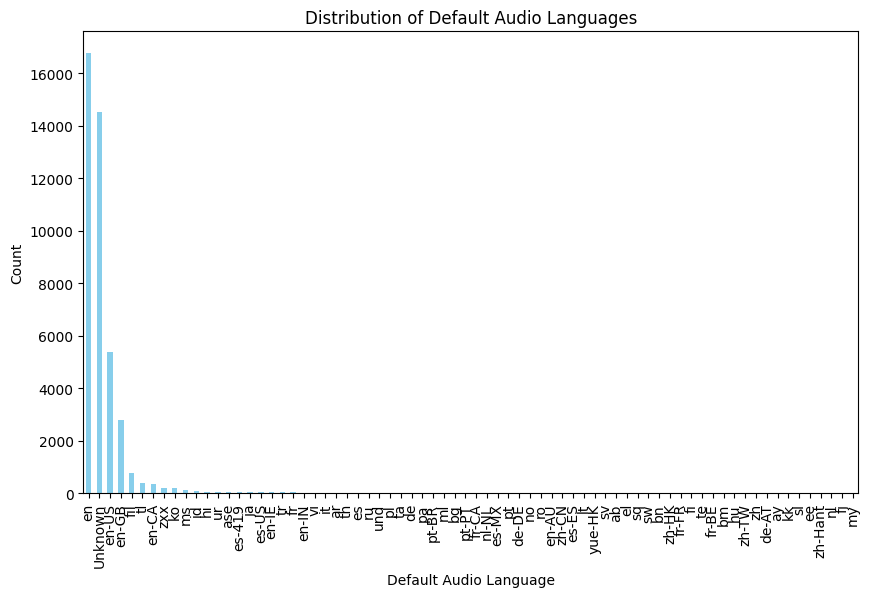

In [8]:
# Explore video titles and descriptions
df['Video Title Length'] = df['Video Title'].apply(lambda x: len(str(x)) if pd.notnull(x) and not isinstance(x, float) else 0)
df['Video Description Length'] = df['Video Description'].apply(lambda x: len(str(x)) if pd.notnull(x) and not isinstance(x, float) else 0)

# Display statistics on text lengths
df[['Video Title Length', 'Video Description Length']].describe()

# Barplot of default audio languages using matplotlib
plt.figure(figsize=(10, 6))
df['Default Audio Language'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Default Audio Languages')
plt.xlabel('Default Audio Language')
plt.ylabel('Count')
plt.show()

In [9]:
# Display distribution of default audio languages
audio_language_distribution = df['Default Audio Language'].value_counts().reset_index()
audio_language_distribution.columns = ['Default Audio Language', 'Count']
print("\nDistribution of Default Audio Languages:")
print(audio_language_distribution)


Distribution of Default Audio Languages:
   Default Audio Language  Count
0                      en  16753
1                 Unknown  14534
2                   en-US   5375
3                   en-GB   2778
4                     fil    787
..                    ...    ...
67                     ee      1
68                zh-Hant      1
69                     nl      1
70                     fj      1
71                     my      1

[72 rows x 2 columns]


### Segment 3: Channel-wise Metrics and Temporal Analysis

This segment calculates average views, likes, and comments per channel, displays top channels by average views, and explores temporal trends by visualizing the number of videos published per month.

In [10]:
# Calculate average views per channel
channel_metrics = df.groupby('Channel Title')['Video Views'].mean().sort_values(ascending=False).head(10)

# Create a PrettyTable
table = PrettyTable(['Channel Title', 'Average Views'])
for channel, views in channel_metrics.items():
    table.add_row([channel, f'{views:,.1f}'])

# Print the table
print("Top Channels by Average Views:")
print(table)

Top Channels by Average Views:
+---------------------------------+---------------+
|          Channel Title          | Average Views |
+---------------------------------+---------------+
|              Domics             |  14,626,169.0 |
|           MANILA GREY           |  7,068,484.0  |
|            Joe HaTTab           |  6,834,980.5  |
|    Best Ever Food Review Show   |  6,447,555.4  |
|             CookieZ             |  5,959,365.0  |
| More Best Ever Food Review Show |  5,826,434.3  |
|           The Try Guys          |  5,653,886.3  |
|      Masterpiece of Voices      |  5,627,763.0  |
|           Aida Coleman          |  5,258,839.0  |
|           Milana Coco           |  5,212,199.5  |
+---------------------------------+---------------+


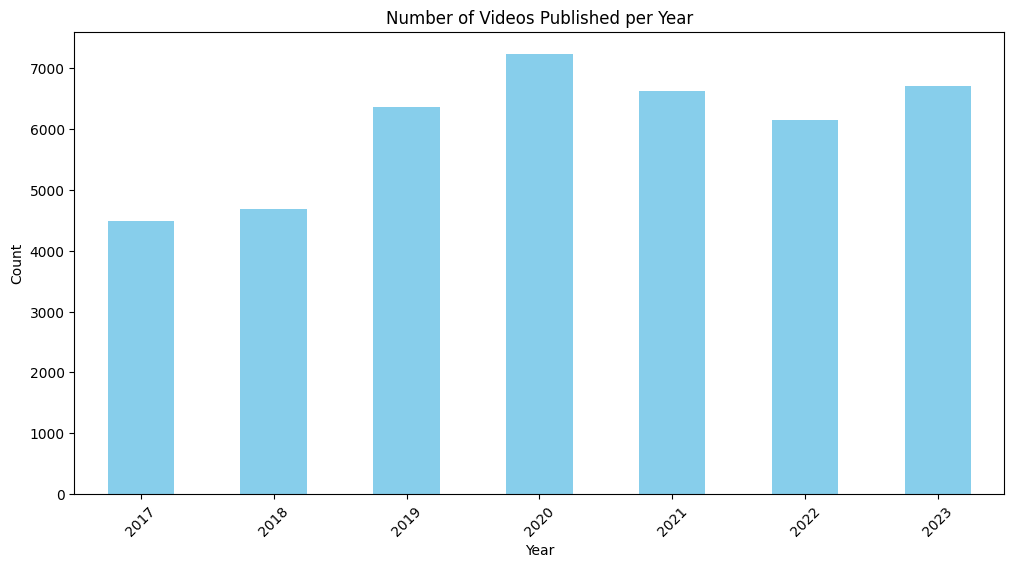

In [11]:
# Convert 'Publish Date' to datetime format
df['Publish Date'] = pd.to_datetime(df['Publish Date'])

# Extract year from the 'Publish Date' column
df['Year'] = df['Publish Date'].dt.year

# Count the number of videos published per year
year_counts = df['Year'].value_counts().sort_index()

# Barplot of videos published per year using matplotlib
plt.figure(figsize=(12, 6))
year_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Videos Published per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Segment 4:

In [14]:
print("Most Common Words in Topics")
word_frequencies = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)
common_words_table = PrettyTable(['Word', 'Frequency'])
for word, freq in zip(word_frequencies.index[:20], word_frequencies.head(20)):
    common_words_table.add_row([word, freq])
print(common_words_table)
print("\n")

Most Common Words in Topics
+-------------+-----------+
|     Word    | Frequency |
+-------------+-----------+
| philippines |   12506   |
|   filipino  |   10203   |
|      to     |    4678   |
|      in     |    4587   |
|  foreigner  |    4511   |
|     the     |    4413   |
|     food    |    4336   |
|    react    |    3009   |
|   reaction  |    2973   |
|     vlog    |    2890   |
|    travel   |    2664   |
|    pinoy    |    1619   |
|    trying   |    1457   |
|    manila   |    1405   |
|   filipina  |    1275   |
|      of     |    1230   |
|  filipinos  |    1137   |
|    living   |    1063   |
|     top     |    898    |
|     try     |    873    |
+-------------+-----------+




Channel Country Statistics
+-----------------+-------+
| Channel Country | Count |
+-----------------+-------+
|        US       |  1897 |
|        GB       |  567  |
|        CA       |  375  |
|        AU       |  256  |
|        KR       |  123  |
|        DE       |   88  |
|        NL       |   78  |
|        JP       |   77  |
|        IN       |   72  |
|        AE       |   68  |
|        SG       |   47  |
|        MY       |   43  |
|        FR       |   34  |
|        TH       |   34  |
|        NZ       |   32  |
|        IT       |   29  |
|        DO       |   27  |
|        NO       |   24  |
|        ZA       |   22  |
|        ES       |   21  |
|        IE       |   20  |
|        HK       |   17  |
|        NG       |   16  |
|        CH       |   15  |
|        LT       |   15  |
|        SA       |   15  |
|        BE       |   15  |
|        ID       |   14  |
|        PK       |   12  |
|        TW       |   12  |
|        PT       |   11  |
|        PL       |  

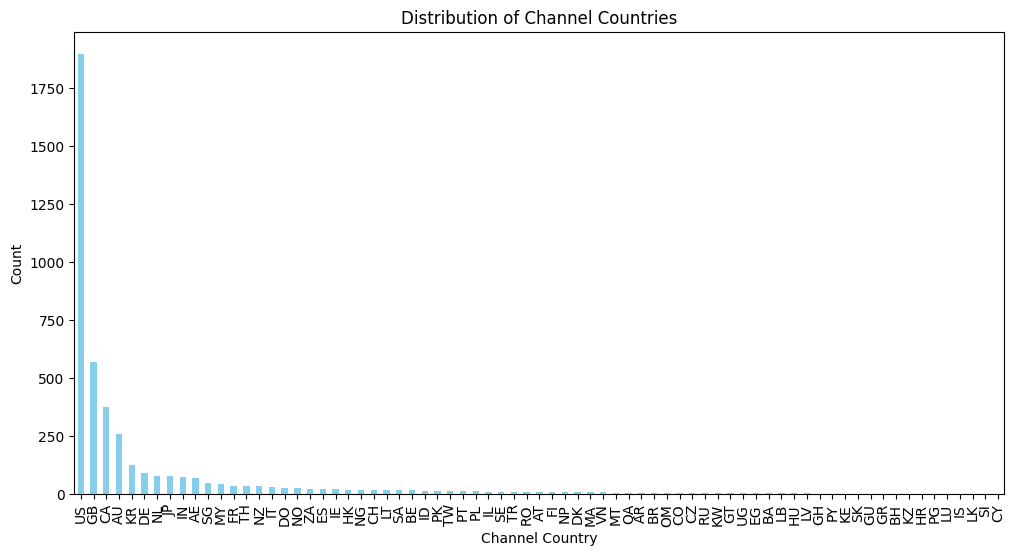

In [15]:
print("Channel Country Statistics")
channel_country_stats = df_subset['Channel Country'].value_counts()
channel_country_table = PrettyTable(['Channel Country', 'Count'])
for country, count in channel_country_stats.items():
    channel_country_table.add_row([country, count])
print(channel_country_table)
print("\n")

# Distribution of 'Channel Country'
print("Distribution of Channel Countries")
plt.figure(figsize=(12, 6))
df_subset['Channel Country'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Channel Countries')
plt.xlabel('Channel Country')
plt.ylabel('Count')
plt.show()

In [21]:
# Take a subset of the data for analysis
df_subset = df.sample(frac=0.1, random_state=42)

# Combine tags and queries into a single text column
df_subset['Combined Text'] = df_subset['Video Tags'] + ' ' + df_subset['Query']

# Tokenize and preprocess the combined text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_subset['Combined Text'])

# Apply LDA for topic modeling
lda = LatentDirichletAllocation(n_components=10, random_state=42)  # Adjust the number of topics as needed
X_lda = lda.fit_transform(X)

# Display LDA topics
print("LDA Topics:")
print("-----------------------------")
for i, topic in enumerate(lda.components_, start=1):
    top_words_idx = topic.argsort()[:-10-1:-1]  # Display top 10 words for each topic
    top_words = [feature_names[idx] for idx in top_words_idx]
    print(f"Topic {i}: {', '.join(top_words)}")
print("\n")


LDA Topics:
-----------------------------
Topic 1: reaction, react, to, filipino, philippines, sb19, pinoy, filipinos, reacts, morissette
Topic 2: in, filipino, to, india, indian, canada, pinoy, how, dubai, dimash
Topic 3: wish, react, bus, fm, to, reaction, filipino, 107, philippines, live
Topic 4: philippines, manila, in, the, cebu, travel, vlog, to, city, foreigner
Topic 5: filipino, food, trying, try, philippines, mukbang, snacks, jollibee, foreigner, street
Topic 6: feature, friday, react, philippines, viral, to, latinos, songs, podcast, music
Topic 7: hotel, filipino, christmas, davao, best, arts, martial, top, terrence, city
Topic 8: philippines, foreigner, the, in, vlog, to, filipino, filipina, living, life
Topic 9: philippines, travel, vlog, to, the, island, in, el, miss, nido
Topic 10: filipino, react, to, pinoy, korean, top, love, recipe, filipinos, how




In [28]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('pinoybaiting_videos_dataset.csv')

# Take a subset of the data for analysis
df_subset = df.sample(frac=0.1, random_state=42)

# Combine tags and queries into a single text column
df_subset['Combined Text'] = df_subset['Video Tags'] + ' ' + df_subset['Query']

# Tokenize and preprocess the combined text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_subset['Combined Text'])

# Apply LDA for topic modeling
lda = LatentDirichletAllocation(n_components=10, random_state=42)  # Adjust the number of topics as needed
X_lda = lda.fit_transform(X)

# Display LDA topics
print("LDA Topics:")
print("-----------------------------")
for i, topic in enumerate(lda.components_, start=1):
    top_words_idx = topic.argsort()[:-10-1:-1]  # Display top 10 words for each topic
    top_words = [vectorizer.get_feature_names_out()[idx] for idx in top_words_idx]
    print(f"Topic {i}: {', '.join(top_words)}")
print("\n")

# Apply KMeans clustering to LDA topic distributions
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
df_subset['Cluster'] = kmeans.fit_predict(X_lda)

# Generate umbrella topics based on the top words in each cluster
umbrella_topics = {}
for cluster in range(kmeans.n_clusters):
    cluster_videos = df_subset[df_subset['Cluster'] == cluster]
    top_words = cluster_videos['Combined Text'].str.split(expand=True).stack().value_counts().index[:5].tolist()
    umbrella_topics[cluster] = ', '.join(top_words)

# Map cluster labels to dynamically generated umbrella topics
df_subset['Umbrella Topic'] = df_subset['Cluster'].map(umbrella_topics)

# Display clusters and their corresponding dynamically generated umbrella topics
print("Clustered Dynamically Generated Umbrella Topics:")
print("------------------------------------------------")
for cluster, umbrella_topic in umbrella_topics.items():
    cluster_videos = df_subset[df_subset['Cluster'] == cluster]
    print(f"Cluster {cluster + 1} (Umbrella Topic: {umbrella_topic}):")
    print(cluster_videos[['Video Title', 'Combined Text']])
    print("\n")


LDA Topics:
-----------------------------
Topic 1: reaction, react, to, filipino, philippines, sb19, pinoy, filipinos, reacts, morissette
Topic 2: in, filipino, to, india, indian, canada, pinoy, how, dubai, dimash
Topic 3: wish, react, bus, fm, to, reaction, filipino, 107, philippines, live
Topic 4: philippines, manila, in, the, cebu, travel, vlog, to, city, foreigner
Topic 5: filipino, food, trying, try, philippines, mukbang, snacks, jollibee, foreigner, street
Topic 6: feature, friday, react, philippines, viral, to, latinos, songs, podcast, music
Topic 7: hotel, filipino, christmas, davao, best, arts, martial, top, terrence, city
Topic 8: philippines, foreigner, the, in, vlog, to, filipino, filipina, living, life
Topic 9: philippines, travel, vlog, to, the, island, in, el, miss, nido
Topic 10: filipino, react, to, pinoy, korean, top, love, recipe, filipinos, how


Clustered Dynamically Generated Umbrella Topics:
------------------------------------------------
Cluster 1 (Umbrella Top